In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
d=data.isnull().sum()
d

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
col=d[d>(.35*data.shape[0])]
col

Cabin    687
dtype: int64

In [11]:
data.drop(["Cabin"],axis=1,inplace=True)

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
data['Embarked']=data["Embarked"].fillna('S')

In [14]:
data=data.fillna(int(data["Age"].mean()))

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

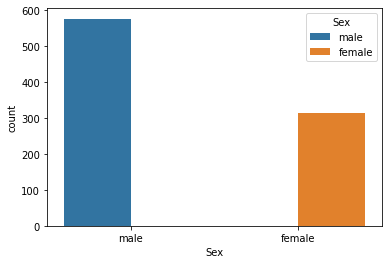

In [19]:
import seaborn as sbn
sbn.countplot(x="Sex",data=data,hue="Sex")

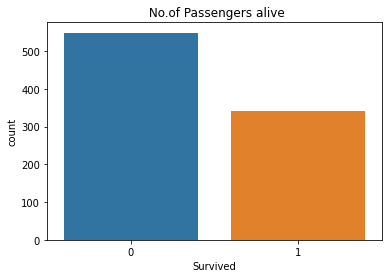

In [20]:
sbn.countplot(x='Survived',data=data)
plt.title(" No.of Passengers alive")
plt.show()

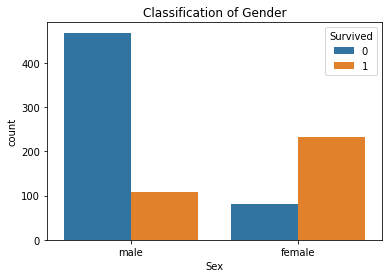

In [21]:
sbn.countplot(x='Sex',hue='Survived',data=data)
plt.title("Classification of Gender")
plt.show()

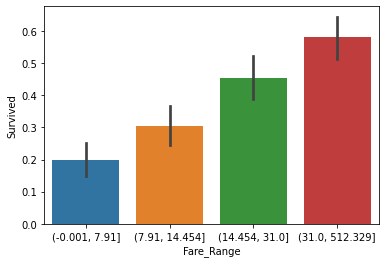

In [27]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

sbn.barplot(x ='Fare_Range', y ='Survived', data = data)

In [23]:
dap=data["Pclass"].value_counts()
dap

3    491
1    216
2    184
Name: Pclass, dtype: int64

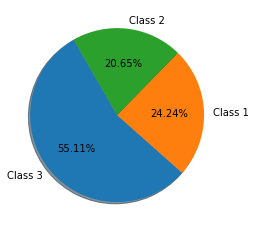

In [24]:
labels=["Class 3","Class 1","Class 2"]
plt.pie(dap,labels=labels,shadow=True,startangle=120,autopct="%0.2f%%")
plt.show();

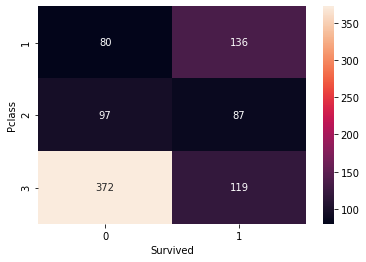

In [26]:
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sbn.heatmap(pclass_survived, annot = True, fmt ="d")

**Conclusion :**
- It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.
- Maximum number of passengers are from Class 3
-  As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.
- Majority of the passengers boarded from S. So, the missing values can be filled with S.
- Majority of class 3 passengers boarded from Q.
- S looks lucky for class 1 and 2 passengers compared to class 3.